In [17]:
import pandas as pd

In [18]:
!ls ../CSVs/Fondeo4/

'13mayo25_Whistle FONDEO4_verificado AGRUPADO.csv'


In [19]:
# take list of csv files in ../CSVs/ and read them into a dictionary of dataframes
csv_files = !ls ../CSVs/Fondeo4/

In [20]:
VALIDATION = "Fondeo4"

In [21]:
# df = pd.DataFrame()

# # Load file
# for file in csv_files:
#     df = pd.concat([df, pd.read_csv(f'../CSVs/{VALIDATION}/{file}')]) 

In [22]:
df = pd.read_csv(f'../CSVs/Fondeo4/13mayo25_Whistle FONDEO4_verificado AGRUPADO.csv')

In [23]:
df

,Idx,Specie,File,Validation,Suggested Specie,Comment
0,1,Whistle,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,-1.0,NaN,NaN
1,2,Whistle,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,-1.0,NaN,NaN
2,3,Whistle,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,-1.0,NaN,NaN
3,4,Whistle,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,0.0,Motor boat,armónicos motor
4,5,Whistle,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,-1.0,NaN,armónicos motor
...,...,...,...,...,...,...
1952,1953,Whistle,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,0.0,Ambiental,roces y clicks
1953,1954,Whistle,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,-1.0,NaN,roces y clicks
1954,1955,Whistle,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,-1.0,NaN,roces y clicks
1955,1956,Whistle,channelA_2025-03-22_23-08-08_4_9_0.76.WAV,-1.0,NaN,roces y clicks


In [24]:
df = df[df['Validation'] != -100]
# df = df[df['Validation'] != -1]
# df = df[df['Validation'] != -2]

In [25]:
# reset index
df = df.reset_index(drop=True)

In [26]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation_Val'] = df['Validation'].map({1: 'Correct', 0: 'Other', -2: 'Unknown', 2: 'Cetacean', -1: 'Incorrect'})

<Figure size 1200x800 with 0 Axes>

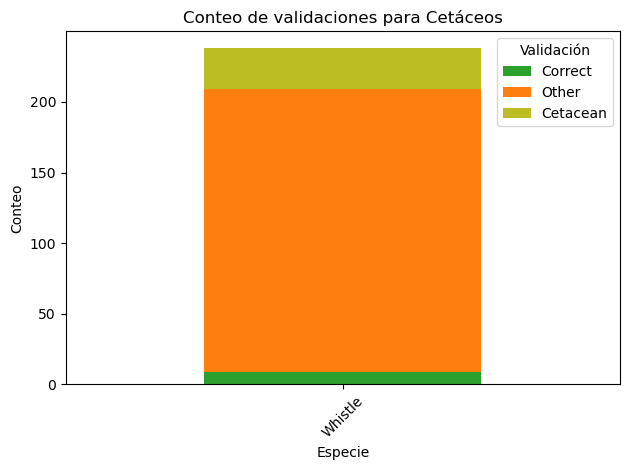

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame


# Green for Correct, Orange for Bird, Red for Other specie, Blue for Unknown
colors = {'Correct': 'C2', 'Cetacean': 'C8', 'Other': 'C1', 'Unknown': 'C0', "Incorrect:": "C3"}

# Group by 'Specie' and 'Validation' and count occurrences
grouped = df.groupby(['Specie', 'Validation_Val']).size().unstack(fill_value=0)

# Ensure the columns are in the correct order
grouped = grouped[['Correct', 'Other', 'Cetacean']]

# Plotting
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, color=[colors[val] for val in grouped.columns])
plt.title('Conteo de validaciones para Cetáceos')
plt.xlabel('Especie')
plt.ylabel('Conteo')
plt.legend(title='Validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
df["Suggested Specie"].unique()

array([nan, 'Motor boat', 'Respiracion', 'Ferry', 'What?', 'Ambiental',
       'Bird', 'Whistle'], dtype=object)

In [29]:
# If validation is correct, set the suggested specie is the same as the specie
df.loc[df['Validation'] == 1, 'Suggested Specie'] = df['Specie']
# if Validation is -2, set Suggested Specie to Cetacean
df.loc[df['Validation'] == 2, 'Suggested Specie'] = 'Cetacean'

In [30]:
# # Drop rows where Validation is Unknown and Bird in df
# print(len(df))

# df = df[df.Validation != 'Unknown']
# df = df[df.Validation != 'Bird']

# print(len(df))

In [31]:
# Reset the index to ensure unique labels
df = df.reset_index(drop=True)

df["SegmentFile"] = df["File"]
df["StartSecond"] = df["File"].str.split("_").str.get(-3)
df["EndSecond"] = df["File"].str.split("_").str.get(-2)
df["ConfidenceScore"] = df["File"].str.replace(".WAV","").str.split("_").str.get(-1)
# File = File split but last 4 elements separated by _
df["File"] = df["File"].str.split('_').str[:-4].str.join('_') + ".WAV"
df

,Idx,Specie,File,Validation,Suggested Specie,Comment,Validation_Val,SegmentFile,StartSecond,EndSecond,ConfidenceScore
0,1,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,NaN,Incorrect,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0,3,1.0
1,2,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,NaN,Incorrect,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259,264,0.61
2,3,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,NaN,Incorrect,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724,729,0.68
3,4,Whistle,channelA_2025-02-21.WAV,0.0,Motor boat,armónicos motor,Other,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205,210,0.55
4,5,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,armónicos motor,Incorrect,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297,1302,0.71
...,...,...,...,...,...,...,...,...,...,...,...
1020,1952,Whistle,channelA_2025-03-22.WAV,0.0,Ambiental,roces y clicks,Other,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177,1182,0.54
1021,1953,Whistle,channelA_2025-03-22.WAV,0.0,Ambiental,roces y clicks,Other,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240,1245,0.58
1022,1954,Whistle,channelA_2025-03-22.WAV,-1.0,NaN,roces y clicks,Incorrect,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487,492,0.55
1023,1955,Whistle,channelA_2025-03-22.WAV,-1.0,NaN,roces y clicks,Incorrect,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0,3,0.77


In [32]:
df

,Idx,Specie,File,Validation,Suggested Specie,Comment,Validation_Val,SegmentFile,StartSecond,EndSecond,ConfidenceScore
0,1,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,NaN,Incorrect,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0,3,1.0
1,2,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,NaN,Incorrect,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259,264,0.61
2,3,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,NaN,Incorrect,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724,729,0.68
3,4,Whistle,channelA_2025-02-21.WAV,0.0,Motor boat,armónicos motor,Other,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205,210,0.55
4,5,Whistle,channelA_2025-02-21.WAV,-1.0,NaN,armónicos motor,Incorrect,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297,1302,0.71
...,...,...,...,...,...,...,...,...,...,...,...
1020,1952,Whistle,channelA_2025-03-22.WAV,0.0,Ambiental,roces y clicks,Other,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177,1182,0.54
1021,1953,Whistle,channelA_2025-03-22.WAV,0.0,Ambiental,roces y clicks,Other,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240,1245,0.58
1022,1954,Whistle,channelA_2025-03-22.WAV,-1.0,NaN,roces y clicks,Incorrect,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487,492,0.55
1023,1955,Whistle,channelA_2025-03-22.WAV,-1.0,NaN,roces y clicks,Incorrect,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0,3,0.77


In [33]:
# Create column StartRecordingTimestamp from File (channelA_YYYY-MM-DD_HH-MM-SS.WAV)
df["StartRecordingTimestamp"] = df["SegmentFile"].str.split('_').str.get(1) + " " + df["SegmentFile"].str.split('_').str.get(2).str.replace(".WAV","")
df["StartRecordingTimestamp"] = pd.to_datetime(df["StartRecordingTimestamp"], format="%Y-%m-%d %H-%M-%S")

# Convert StartSecond and EndSecond to numeric values
df["StartSecond"] = pd.to_numeric(df["StartSecond"])
df["EndSecond"] = pd.to_numeric(df["EndSecond"])

# StartAnnotationTimestamp = StartRecordingTimestamp + StartSecond
df["StartAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["StartSecond"], unit='s')
# EndAnnotationTimestamp = StartRecordingTimestamp + EndSecond
df["EndAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["EndSecond"], unit='s')

# Order of columns: File, SegmentFile, StartSecond, EndSecond, StartRecordingTimestamp, StartAnnotationTimestamp, EndAnnotationTimestamp, Specie, Validation, Suggested Specie, ConfidenceScore
df = df[['File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Specie', 'Validation', 'Suggested Specie', 'ConfidenceScore']]
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,-1.0,NaN,1.0
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,-1.0,NaN,0.61
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,-1.0,NaN,0.68
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0.0,Motor boat,0.55
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,-1.0,NaN,0.71
...,...,...,...,...,...,...,...,...,...,...,...
1020,channelA_2025-03-22.WAV,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177.0,1182.0,2025-03-22 20:35:12,2025-03-22 20:54:49,2025-03-22 20:54:54,Whistle,0.0,Ambiental,0.54
1021,channelA_2025-03-22.WAV,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240.0,1245.0,2025-03-22 20:57:03,2025-03-22 21:17:43,2025-03-22 21:17:48,Whistle,0.0,Ambiental,0.58
1022,channelA_2025-03-22.WAV,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487.0,492.0,2025-03-22 21:40:45,2025-03-22 21:48:52,2025-03-22 21:48:57,Whistle,-1.0,NaN,0.55
1023,channelA_2025-03-22.WAV,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0.0,3.0,2025-03-22 23:08:08,2025-03-22 23:08:08,2025-03-22 23:08:11,Whistle,-1.0,NaN,0.77


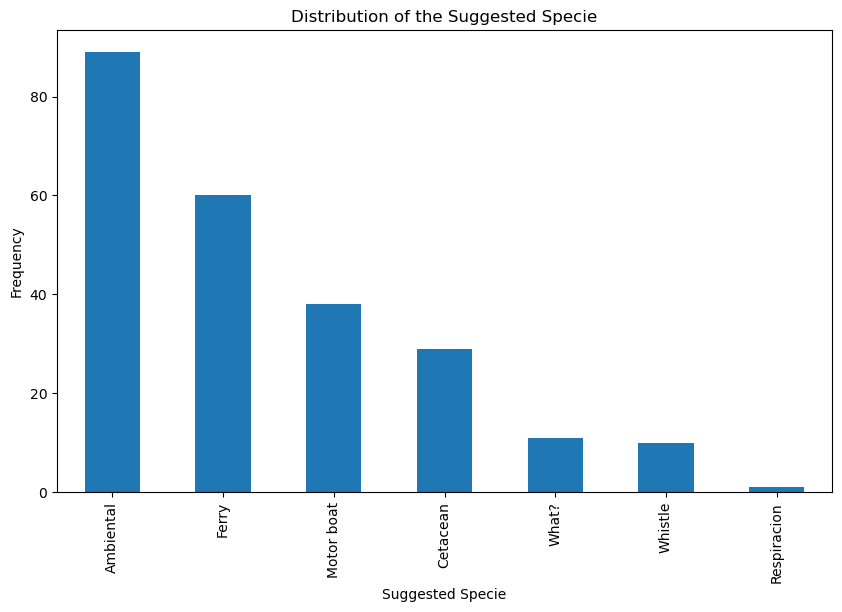

In [34]:
import matplotlib.pyplot as plt
# Distribution of the Altertative
plt.figure(figsize=(10, 6))
df['Suggested Specie'].value_counts().plot(kind='bar')
plt.xlabel('Suggested Specie')
plt.ylabel('Frequency')
plt.title('Distribution of the Suggested Specie')
plt.show()

In [35]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,-1.0,NaN,1.0
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,-1.0,NaN,0.61
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,-1.0,NaN,0.68
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0.0,Motor boat,0.55
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,-1.0,NaN,0.71
...,...,...,...,...,...,...,...,...,...,...,...
1020,channelA_2025-03-22.WAV,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177.0,1182.0,2025-03-22 20:35:12,2025-03-22 20:54:49,2025-03-22 20:54:54,Whistle,0.0,Ambiental,0.54
1021,channelA_2025-03-22.WAV,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240.0,1245.0,2025-03-22 20:57:03,2025-03-22 21:17:43,2025-03-22 21:17:48,Whistle,0.0,Ambiental,0.58
1022,channelA_2025-03-22.WAV,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487.0,492.0,2025-03-22 21:40:45,2025-03-22 21:48:52,2025-03-22 21:48:57,Whistle,-1.0,NaN,0.55
1023,channelA_2025-03-22.WAV,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0.0,3.0,2025-03-22 23:08:08,2025-03-22 23:08:08,2025-03-22 23:08:11,Whistle,-1.0,NaN,0.77


In [36]:
df["Suggested Specie"].unique()

array([nan, 'Motor boat', 'Whistle', 'Respiracion', 'Ferry', 'What?',
       'Ambiental', 'Cetacean'], dtype=object)

In [37]:
# count number of rows with each Suggested Specie
df['Suggested Specie'].value_counts()

Suggested Specie
Ambiental      89
Ferry          60
Motor boat     38
Cetacean       29
What?          11
Whistle        10
Respiracion     1
Name: count, dtype: int64

In [38]:
# delete rows where Suggested Specie is " "
# df = df[df['Suggested Specie'] != " "]
# delete rows with Suggestions = WHAT?
df = df[df['Suggested Specie'] != 'WHAT?']

In [39]:
df.loc[df['Suggested Specie'].isin(['Ferry_Fast ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Big motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Respiracion']), 'Suggested Specie'] = 'Breath'

In [40]:
# whistle, human_diver_1_breath, human_diver_2_wee, Ferry_FastFerry, Motor_boat
# # If CommonDolphin, KillerWhale or Cetacean, set Suggested Specie to Whistle
# df.loc[df['Suggested Specie'].isin(['CommonDolphin', 'KillerWhale', 'Cetacean']), 'Suggested Specie'] = 'Whistle'
# # If Human_diver set to Human_diver_1_breath
# df.loc[df['Suggested Specie'].isin(['Human_diver']), 'Suggested Specie'] = 'Human_diver_1_breath'
# # If Diver+wee set to Human_diver_2_wee
# df.loc[df['Suggested Specie'].isin(['Diver+wee']), 'Suggested Specie'] = 'Human_diver_2_wee'
# # If Motor boat set to Motor_boat
# df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
# # If Ferry set to Ferry_FastFerry
# df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,-1.0,NaN,1.0
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,-1.0,NaN,0.61
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,-1.0,NaN,0.68
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0.0,Motor_boat,0.55
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,-1.0,NaN,0.71
...,...,...,...,...,...,...,...,...,...,...,...
1020,channelA_2025-03-22.WAV,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177.0,1182.0,2025-03-22 20:35:12,2025-03-22 20:54:49,2025-03-22 20:54:54,Whistle,0.0,Ambiental,0.54
1021,channelA_2025-03-22.WAV,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240.0,1245.0,2025-03-22 20:57:03,2025-03-22 21:17:43,2025-03-22 21:17:48,Whistle,0.0,Ambiental,0.58
1022,channelA_2025-03-22.WAV,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487.0,492.0,2025-03-22 21:40:45,2025-03-22 21:48:52,2025-03-22 21:48:57,Whistle,-1.0,NaN,0.55
1023,channelA_2025-03-22.WAV,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0.0,3.0,2025-03-22 23:08:08,2025-03-22 23:08:08,2025-03-22 23:08:11,Whistle,-1.0,NaN,0.77


In [41]:
# # take only Ferry_FastFerry and Motor_boat and save csv
# df = df[df['Suggested Specie'].isin(['Ferry_FastFerry', 'Motor_boat'])]
# # delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# df.to_csv('../CSVs/NOWOPAMDay_456/Ferry_FastFerry_Motor_boat.csv', index=False)

In [42]:
# delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# # save csv as wopam_day_annotations.csv
# df.to_csv('wopam_day_annotations.csv', index=False)

In [43]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,-1.0,NaN,1.0
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,-1.0,NaN,0.61
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,-1.0,NaN,0.68
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0.0,Motor_boat,0.55
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,-1.0,NaN,0.71
...,...,...,...,...,...,...,...,...,...,...,...
1020,channelA_2025-03-22.WAV,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177.0,1182.0,2025-03-22 20:35:12,2025-03-22 20:54:49,2025-03-22 20:54:54,Whistle,0.0,Ambiental,0.54
1021,channelA_2025-03-22.WAV,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240.0,1245.0,2025-03-22 20:57:03,2025-03-22 21:17:43,2025-03-22 21:17:48,Whistle,0.0,Ambiental,0.58
1022,channelA_2025-03-22.WAV,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487.0,492.0,2025-03-22 21:40:45,2025-03-22 21:48:52,2025-03-22 21:48:57,Whistle,-1.0,NaN,0.55
1023,channelA_2025-03-22.WAV,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0.0,3.0,2025-03-22 23:08:08,2025-03-22 23:08:08,2025-03-22 23:08:11,Whistle,-1.0,NaN,0.77


In [44]:
# show Validation nan
# Drop rows where Validation is nan
df = df.dropna(subset=['Validation'])

In [45]:
# Make Validation integer
df["Validation"] = df["Validation"].astype(int)
df["Validation Value"] = df["Validation"].map({'Whistle': 1, 'Other specie': 0, 'Unknown': -2, 'Whistle': 2, 'Incorrect': -1})

/tmp/ipykernel_5346/2998985122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation"] = df["Validation"].astype(int)
/tmp/ipykernel_5346/2998985122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation Value"] = df["Validation"].map({'Whistle': 1, 'Other specie': 0, 'Unknown': -2, 'Whistle': 2, 'Incorrect': -1})


In [46]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation Value'] = df['Validation'].map({1: 'Whistle', 0: 'Other', -2: 'Unknown', 2: 'Whistle', -1: 'Incorrect'})
df

/tmp/ipykernel_5346/3866937667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Validation Value'] = df['Validation'].map({1: 'Whistle', 0: 'Other', -2: 'Unknown', 2: 'Whistle', -1: 'Incorrect'})


,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,-1,NaN,1.0,Incorrect
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,-1,NaN,0.61,Incorrect
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,-1,NaN,0.68,Incorrect
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0,Motor_boat,0.55,Other
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,-1,NaN,0.71,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,channelA_2025-03-22.WAV,channelA_2025-03-22_20-35-12_1177_1182_0.54.WAV,1177.0,1182.0,2025-03-22 20:35:12,2025-03-22 20:54:49,2025-03-22 20:54:54,Whistle,0,Ambiental,0.54,Other
1021,channelA_2025-03-22.WAV,channelA_2025-03-22_20-57-03_1240_1245_0.58.WAV,1240.0,1245.0,2025-03-22 20:57:03,2025-03-22 21:17:43,2025-03-22 21:17:48,Whistle,0,Ambiental,0.58,Other
1022,channelA_2025-03-22.WAV,channelA_2025-03-22_21-40-45_487_492_0.55.WAV,487.0,492.0,2025-03-22 21:40:45,2025-03-22 21:48:52,2025-03-22 21:48:57,Whistle,-1,NaN,0.55,Incorrect
1023,channelA_2025-03-22.WAV,channelA_2025-03-22_23-08-08_0_3_0.77.WAV,0.0,3.0,2025-03-22 23:08:08,2025-03-22 23:08:08,2025-03-22 23:08:11,Whistle,-1,NaN,0.77,Incorrect


In [47]:
# Drop rows where StartRecordingTimestamp is later than 3 March 2025
df = df[df['StartRecordingTimestamp'] < '2025-03-03']
# reset index
df = df.reset_index(drop=True)
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,-1,NaN,1.0,Incorrect
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,-1,NaN,0.61,Incorrect
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,-1,NaN,0.68,Incorrect
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0,Motor_boat,0.55,Other
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,-1,NaN,0.71,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...
123,channelA_2025-03-02.WAV,channelA_2025-03-02_10-46-25_814_819_0.72.WAV,814.0,819.0,2025-03-02 10:46:25,2025-03-02 10:59:59,2025-03-02 11:00:04,Whistle,0,Motor_boat,0.72,Other
124,channelA_2025-03-02.WAV,channelA_2025-03-02_13-41-12_307_312_0.52.WAV,307.0,312.0,2025-03-02 13:41:12,2025-03-02 13:46:19,2025-03-02 13:46:24,Whistle,-1,NaN,0.52,Incorrect
125,channelA_2025-03-02.WAV,channelA_2025-03-02_14-24-54_985_990_0.51.WAV,985.0,990.0,2025-03-02 14:24:54,2025-03-02 14:41:19,2025-03-02 14:41:24,Whistle,0,Ferry_FastFerry,0.51,Other
126,channelA_2025-03-02.WAV,channelA_2025-03-02_16-57-51_625_630_0.59.WAV,625.0,630.0,2025-03-02 16:57:51,2025-03-02 17:08:16,2025-03-02 17:08:21,Whistle,-1,NaN,0.59,Incorrect


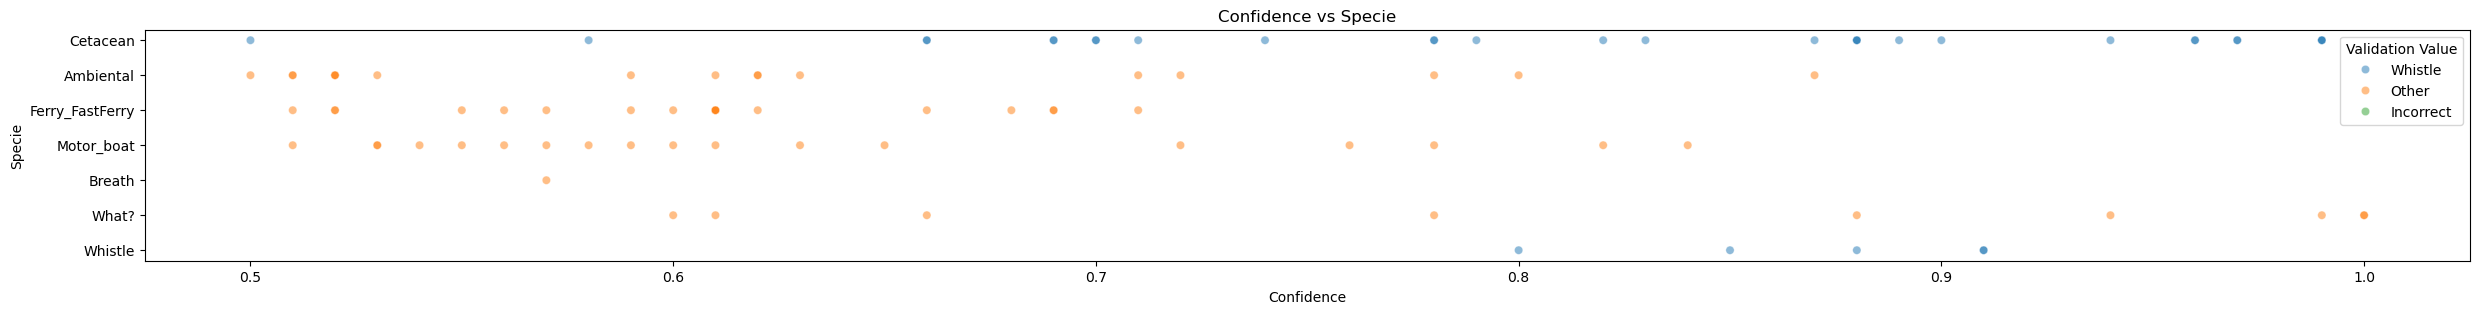

In [48]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Validation Value", alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

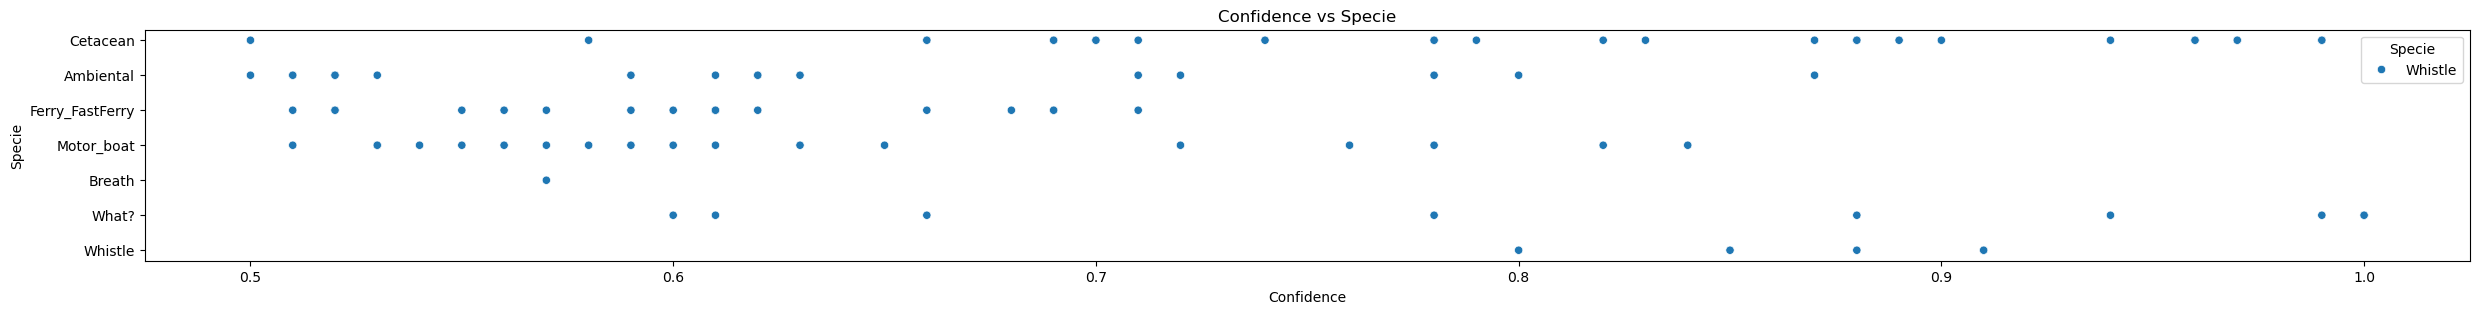

In [49]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Specie", alpha=1)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_5346/494332848.py:11: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)


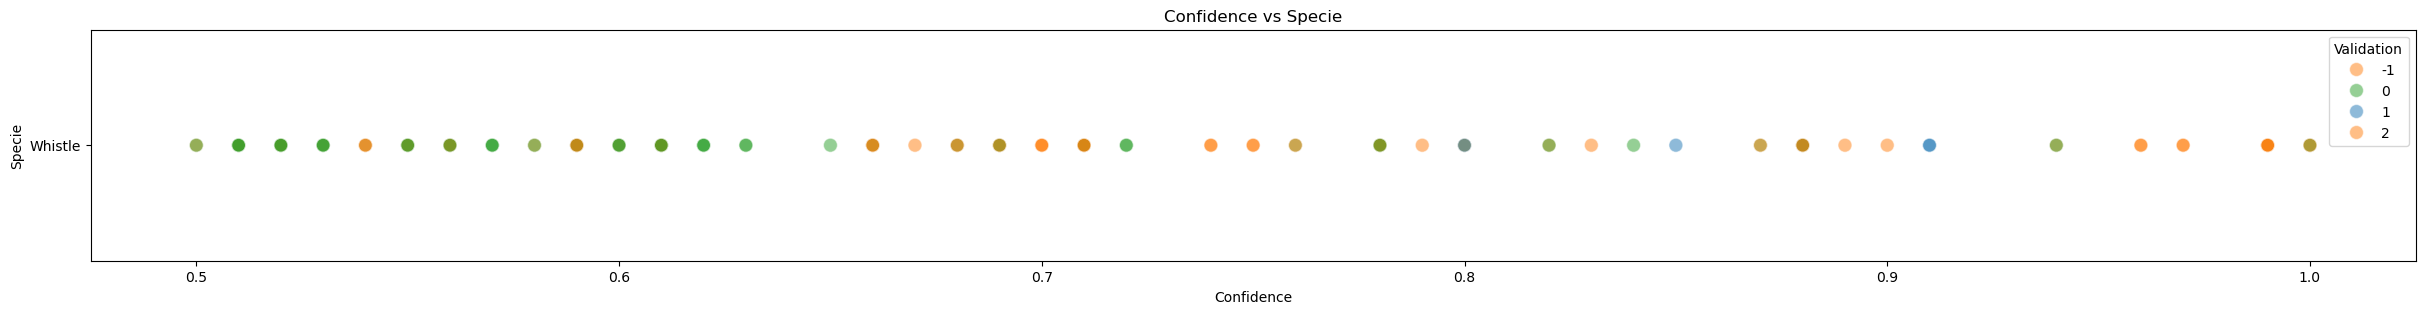

In [50]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

In [51]:
# df_regression

In [52]:
# Logistic regression for df, set Validation to 1 if Whistle or Cetacean and 0 if Other specie or Unknown
df_regression = df.copy()
df_regression.loc[df_regression['Validation'] == 1, 'Validation'] = 1
df_regression.loc[df_regression['Validation'] == 2, 'Validation'] = 1
df_regression.loc[df_regression['Validation'] == 0, 'Validation'] = 0
df_regression.loc[df_regression['Validation'] == -2, 'Validation'] = 0
df_regression.loc[df_regression['Validation'] == -1, 'Validation'] = 0

# Drop columns that are not needed
# df_regression = df_regression.drop(columns=['Specie', 'File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Suggested Specie', 'Validation Value'])

Model's probability range: 0.19 to 0.85
Threshold at 47% correctness:
- Logit Score: 3.91
- Confidence Score: 0.98
- Positives: 8
- Real Positives: 34
- True Positives: 3
- True Positives Lost: 31
- False Positives Included: 5
- False Positives not Included: 89


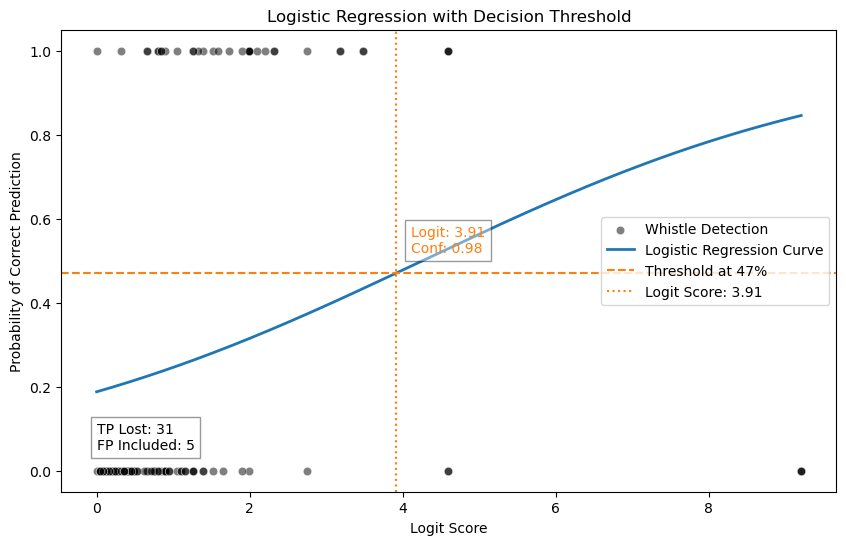

Percentage of missing positives: 3.25%


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
correctness_threshold = 0.47  # Change this value to test different thresholds

# 8. Find Logit Score for Given Probability (X-axis intersection)
logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- Positives: {true_positives + false_positives}")
print(f"- Real Positives: {total_positives}")
print(f"- True Positives: {true_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

missing_positives = ((total_positives - (true_positives + false_positives))) / (true_positives + false_positives)
print(f"Percentage of missing positives: {missing_positives:.2f}%")

Model's probability range: 0.19 to 0.85
Threshold at 40% correctness:
- Logit Score: 1.32
- Confidence Score: 0.79
- Predicted Positives: 34
- Real Positives: 34
- True Positives: 22
- True Positives Lost: 12
- False Positives Included: 12
- False Positives not Included: 82


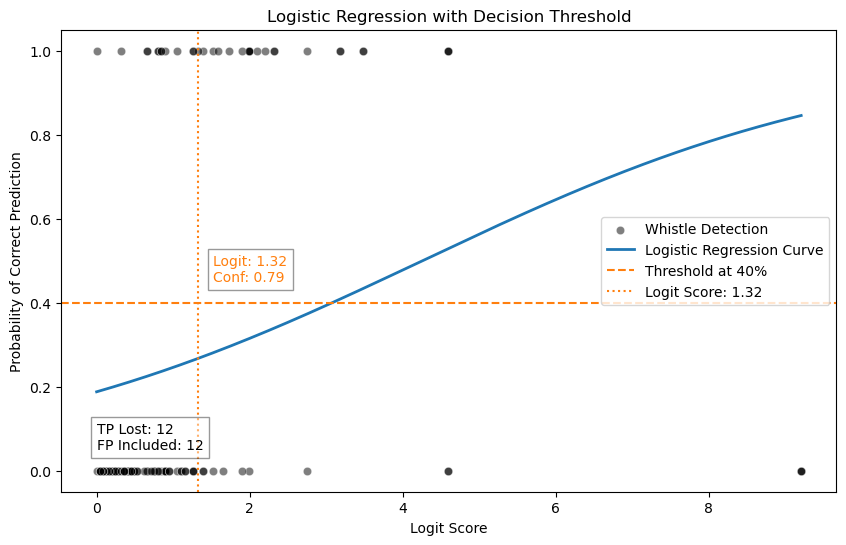

Percentage of missing positives: 0.00%


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
# correctness_threshold = 0.365  # Change this value to test different thresholds
confidence_threshold = 0.79

# 8. Find Logit Score for Given Probability (X-axis intersection)
# logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())
logit_threshold = np.log(confidence_threshold / (1 - confidence_threshold))

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
# confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
total_negatives = np.sum(y == 0)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- Predicted Positives: {true_positives + false_positives}")
print(f"- Real Positives: {total_positives}")
print(f"- True Positives: {true_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

missing_positives = ((total_positives - (true_positives + false_positives))) / (true_positives + false_positives)
print(f"Percentage of missing positives: {missing_positives:.2f}%")

Model's probability range: 0.19 to 0.85
Threshold at 40% correctness:
- Logit Score: 3.08
- Confidence Score: 0.96
- True Positives: 34
- True Positives Lost: 27
- False Positives: 94
- False Positives Included: 5
- False Positives not Included: 89


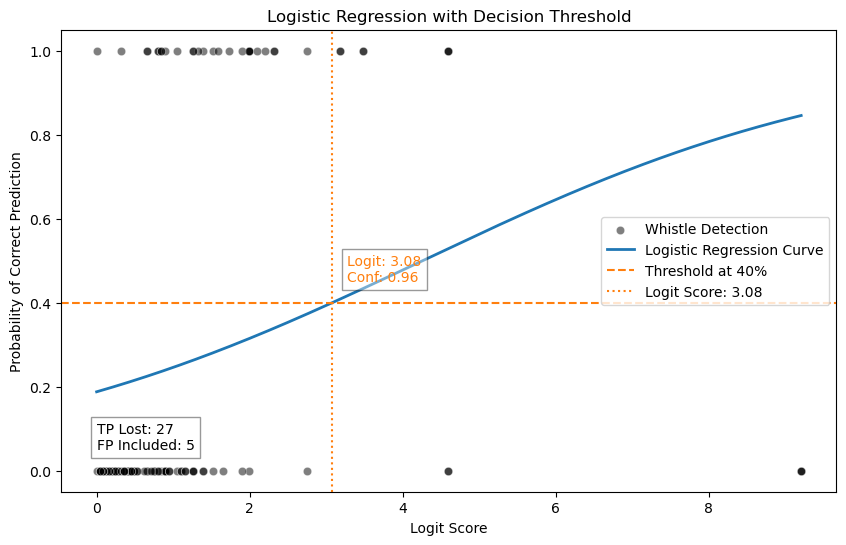

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
correctness_threshold = 0.4  # Change this value to test different thresholds

# 8. Find Logit Score for Given Probability (X-axis intersection)
logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
total_negatives = np.sum(y == 0)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- True Positives: {total_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives: {total_negatives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

In [55]:
# Show df_regression sorted by LogitScore
df_regression.sort_values(by='LogitScore', ascending=True)

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
31,channelA_2025-02-22.WAV,channelA_2025-02-22_22-58-40_307_312_0.5.WAV,307.0,312.0,2025-02-22 22:58:40,2025-02-22 23:03:47,2025-02-22 23:03:52,Whistle,1,Cetacean,0.5000,Whistle,0.000
67,channelA_2025-02-24.WAV,channelA_2025-02-24_21-35-23_118_123_0.5.WAV,118.0,123.0,2025-02-24 21:35:23,2025-02-24 21:37:21,2025-02-24 21:37:26,Whistle,0,Ambiental,0.5000,Other,0.000
16,channelA_2025-02-22.WAV,channelA_2025-02-22_15-19-49_496_501_0.51.WAV,496.0,501.0,2025-02-22 15:19:49,2025-02-22 15:28:05,2025-02-22 15:28:10,Whistle,0,Ambiental,0.5100,Other,0.040
78,channelA_2025-02-27.WAV,channelA_2025-02-27_10-40-14_757_762_0.51.WAV,757.0,762.0,2025-02-27 10:40:14,2025-02-27 10:52:51,2025-02-27 10:52:56,Whistle,0,NaN,0.5100,Incorrect,0.040
65,channelA_2025-02-24.WAV,channelA_2025-02-24_15-02-05_478_483_0.51.WAV,478.0,483.0,2025-02-24 15:02:05,2025-02-24 15:10:03,2025-02-24 15:10:08,Whistle,0,NaN,0.5100,Incorrect,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,channelA_2025-02-22.WAV,channelA_2025-02-22_22-58-40_244_249_0.99.WAV,244.0,249.0,2025-02-22 22:58:40,2025-02-22 23:02:44,2025-02-22 23:02:49,Whistle,1,Cetacean,0.9900,Whistle,4.595
35,channelA_2025-02-22.WAV,channelA_2025-02-22_22-58-40_328_333_0.99.WAV,328.0,333.0,2025-02-22 22:58:40,2025-02-22 23:04:08,2025-02-22 23:04:13,Whistle,1,Cetacean,0.9900,Whistle,4.595
49,channelA_2025-02-23.WAV,channelA_2025-02-23_11-43-23_523_528_1.0.WAV,523.0,528.0,2025-02-23 11:43:23,2025-02-23 11:52:06,2025-02-23 11:52:11,Whistle,0,What?,0.9999,Other,9.210
50,channelA_2025-02-23.WAV,channelA_2025-02-23_11-43-23_526_531_1.0.WAV,526.0,531.0,2025-02-23 11:43:23,2025-02-23 11:52:09,2025-02-23 11:52:14,Whistle,0,What?,0.9999,Other,9.210


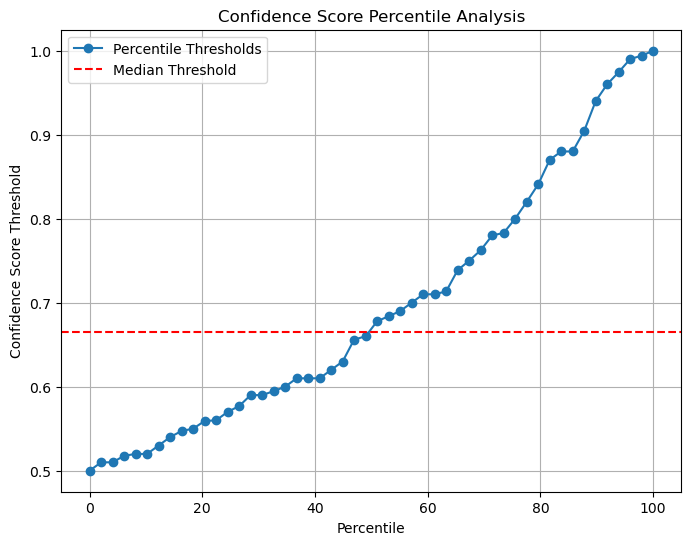

Best Confidence Score Threshold (90th Percentile): 0.94


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract confidence scores from your regression DataFrame
confidence_scores = df_regression["ConfidenceScore"].values

# Sort confidence scores
sorted_confidence = np.sort(confidence_scores)

# Define percentiles to analyze
percentiles = np.linspace(0, 100, 50)  # 50 evenly spaced percentiles
thresholds = np.percentile(sorted_confidence, percentiles)

# Plot Confidence Score Percentile Analysis
plt.figure(figsize=(8, 6))
plt.plot(percentiles, thresholds, marker='o', linestyle='-', color='C0', label="Percentile Thresholds")
plt.xlabel('Percentile')
plt.ylabel('Confidence Score Threshold')
plt.title('Confidence Score Percentile Analysis')
plt.axhline(y=np.median(sorted_confidence), color='r', linestyle='dashed', label="Median Threshold")
plt.legend()
plt.grid()
plt.show()

# Select best threshold (e.g., 90th percentile as a decision boundary)
best_threshold = np.percentile(sorted_confidence, 90)
print(f"Best Confidence Score Threshold (90th Percentile): {best_threshold:.2f}")


Best Confidence Score Threshold: 0.69


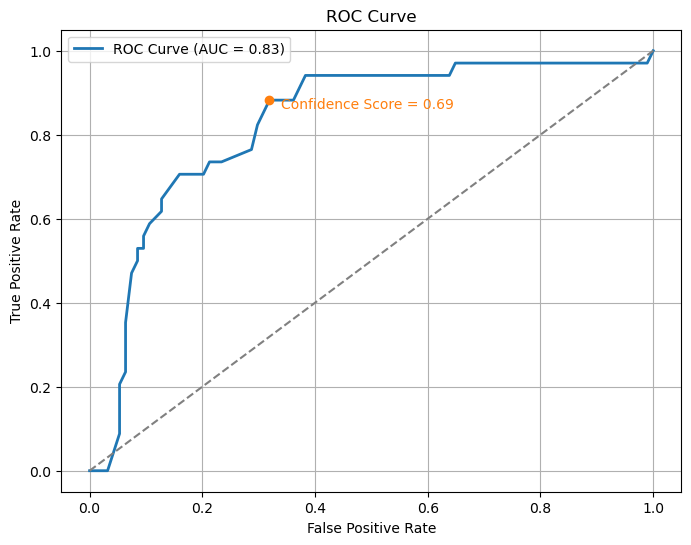

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Extract Confidence Scores & Validation Labels (1 = Correct, 0 = Incorrect)
y_true = df_regression["Validation"].values  # 1 = Correct Prediction, 0 = Incorrect Prediction
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score

# Compute ROC Curve (False Positive Rate & True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)  # Compute AUC Score

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='C0', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

# Find the Best Threshold (Closest to (0,1) on ROC Curve)
best_index = np.argmax(tpr - fpr)  # Maximize TPR - FPR
best_threshold = thresholds[best_index]

# Highlight the best threshold on the graph
plt.scatter(fpr[best_index], tpr[best_index], color='C1', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
plt.text(fpr[best_index] + 0.02, tpr[best_index] - 0.02, 
         f"Confidence Score = {best_threshold:.2f}", 
         color='C1', fontsize=10)

print(f"Best Confidence Score Threshold: {best_threshold:.2f}")

plt.show()


In [58]:
df_regression

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,0,NaN,0.9999,Incorrect,9.210
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,0,NaN,0.6100,Incorrect,0.447
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,0,NaN,0.6800,Incorrect,0.754
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0,Motor_boat,0.5500,Other,0.201
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,0,NaN,0.7100,Incorrect,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,channelA_2025-03-02.WAV,channelA_2025-03-02_10-46-25_814_819_0.72.WAV,814.0,819.0,2025-03-02 10:46:25,2025-03-02 10:59:59,2025-03-02 11:00:04,Whistle,0,Motor_boat,0.7200,Other,0.944
124,channelA_2025-03-02.WAV,channelA_2025-03-02_13-41-12_307_312_0.52.WAV,307.0,312.0,2025-03-02 13:41:12,2025-03-02 13:46:19,2025-03-02 13:46:24,Whistle,0,NaN,0.5200,Incorrect,0.080
125,channelA_2025-03-02.WAV,channelA_2025-03-02_14-24-54_985_990_0.51.WAV,985.0,990.0,2025-03-02 14:24:54,2025-03-02 14:41:19,2025-03-02 14:41:24,Whistle,0,Ferry_FastFerry,0.5100,Other,0.040
126,channelA_2025-03-02.WAV,channelA_2025-03-02_16-57-51_625_630_0.59.WAV,625.0,630.0,2025-03-02 16:57:51,2025-03-02 17:08:16,2025-03-02 17:08:21,Whistle,0,NaN,0.5900,Incorrect,0.364


In [59]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve, auc

# # Extract Confidence Scores & Validation Labels (1 = Correct, 0 = Incorrect)
# y_true = df_regression["Validation"].values  # 1 = Correct Prediction, 0 = Incorrect Prediction
# y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score

# # Compute Precision and Recall
# precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# # Plot Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='C0', lw=2, label='Precision-Recall Curve')

# # Highlight the best threshold
# best_threshold_index = np.argmax(precision + recall)
# best_threshold = thresholds[best_threshold_index]
# plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='C1', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
# plt.text(recall[best_threshold_index] + 0.02, precision[best_threshold_index] - 0.02, 
#          f"Confidence\nScore = {best_threshold:.2f}", color='C1', fontsize=10)

# # Labels and Title
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Calculate AUC for Precision-Recall Curve
# pr_auc = auc(recall, precision)
# print(f"Precision-Recall AUC: {pr_auc:.2f}")
# print(f"Best Confidence Score Threshold for Precision-Recall Curve: {best_threshold:.2f}")

In [60]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Find the index where the sum of Precision and Recall is maximized
best_threshold_index = np.argmax(precision + recall)

# Get the best threshold value
best_threshold = thresholds[best_threshold_index]

# Print out the best threshold and corresponding precision and recall values
print(f"Best Confidence Score Threshold (Max Precision + Recall): {best_threshold:.2f}")
print(f"Precision at Threshold: {precision[best_threshold_index]:.2f}")
print(f"Recall at Threshold: {recall[best_threshold_index]:.2f}")

Best Confidence Score Threshold (Max Precision + Recall): 0.66
Precision at Threshold: 0.47
Recall at Threshold: 0.94


In [61]:
df_regression

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
0,channelA_2025-02-21.WAV,channelA_2025-02-21_00-00-03_0_3_1.0.WAV,0.0,3.0,2025-02-21 00:00:03,2025-02-21 00:00:03,2025-02-21 00:00:06,Whistle,0,NaN,0.9999,Incorrect,9.210
1,channelA_2025-02-21.WAV,channelA_2025-02-21_02-54-51_259_264_0.61.WAV,259.0,264.0,2025-02-21 02:54:51,2025-02-21 02:59:10,2025-02-21 02:59:15,Whistle,0,NaN,0.6100,Incorrect,0.447
2,channelA_2025-02-21.WAV,channelA_2025-02-21_16-23-18_724_729_0.68.WAV,724.0,729.0,2025-02-21 16:23:18,2025-02-21 16:35:22,2025-02-21 16:35:27,Whistle,0,NaN,0.6800,Incorrect,0.754
3,channelA_2025-02-21.WAV,channelA_2025-02-21_21-07-20_205_210_0.55.WAV,205.0,210.0,2025-02-21 21:07:20,2025-02-21 21:10:45,2025-02-21 21:10:50,Whistle,0,Motor_boat,0.5500,Other,0.201
4,channelA_2025-02-21.WAV,channelA_2025-02-21_21-51-02_1297_1302_0.71.WAV,1297.0,1302.0,2025-02-21 21:51:02,2025-02-21 22:12:39,2025-02-21 22:12:44,Whistle,0,NaN,0.7100,Incorrect,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,channelA_2025-03-02.WAV,channelA_2025-03-02_10-46-25_814_819_0.72.WAV,814.0,819.0,2025-03-02 10:46:25,2025-03-02 10:59:59,2025-03-02 11:00:04,Whistle,0,Motor_boat,0.7200,Other,0.944
124,channelA_2025-03-02.WAV,channelA_2025-03-02_13-41-12_307_312_0.52.WAV,307.0,312.0,2025-03-02 13:41:12,2025-03-02 13:46:19,2025-03-02 13:46:24,Whistle,0,NaN,0.5200,Incorrect,0.080
125,channelA_2025-03-02.WAV,channelA_2025-03-02_14-24-54_985_990_0.51.WAV,985.0,990.0,2025-03-02 14:24:54,2025-03-02 14:41:19,2025-03-02 14:41:24,Whistle,0,Ferry_FastFerry,0.5100,Other,0.040
126,channelA_2025-03-02.WAV,channelA_2025-03-02_16-57-51_625_630_0.59.WAV,625.0,630.0,2025-03-02 16:57:51,2025-03-02 17:08:16,2025-03-02 17:08:21,Whistle,0,NaN,0.5900,Incorrect,0.364


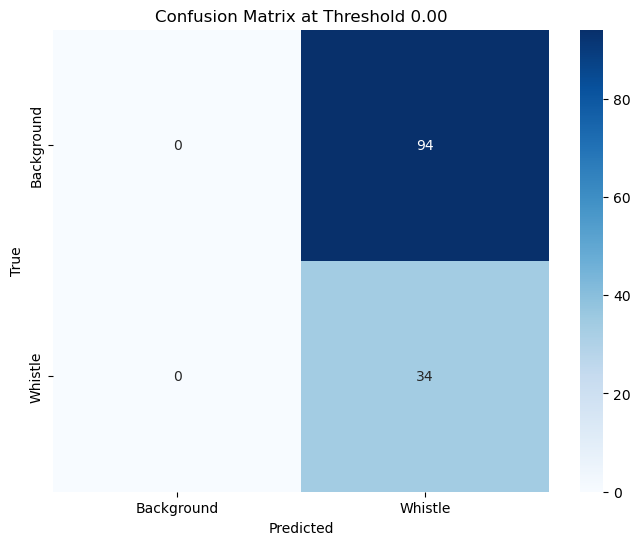

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.27      1.00      0.42        34

    accuracy                           0.27       128
   macro avg       0.13      0.50      0.21       128
weighted avg       0.07      0.27      0.11       128



/home/gruncrow/anaconda3/envs/DataAnalysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gruncrow/anaconda3/envs/DataAnalysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gruncrow/anaconda3/envs/DataAnalysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [46]:
# Calculate all metrics for confidence score threshold 0.84
from sklearn.metrics import confusion_matrix, classification_report
# Set the threshold
threshold = 0

# Convert y_true to binary: 1 for 'Whistle', 0 for all others
y_true = (df_regression["Validation Value"] == "Whistle").astype(int).values
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score
# Predict labels based on the threshold
predicted_labels = (y_scores >= threshold).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Whistle'], yticklabels=['Background', 'Whistle'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix at Threshold {threshold:.2f}')
plt.show()

# Calculate classification report
print(classification_report(y_true, predicted_labels))

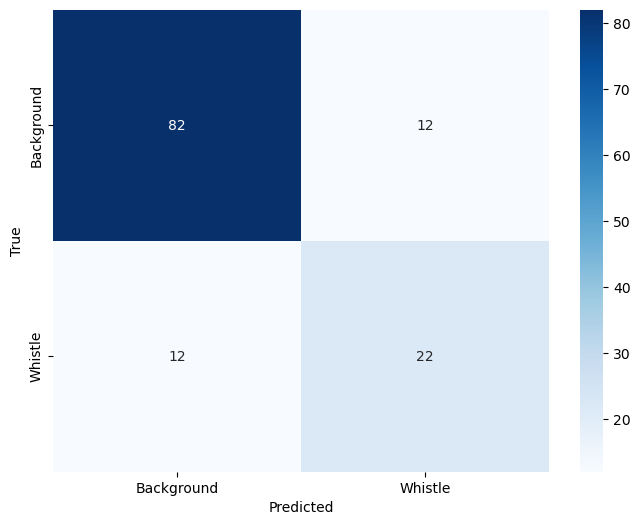

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        94
           1       0.65      0.65      0.65        34

    accuracy                           0.81       128
   macro avg       0.76      0.76      0.76       128
weighted avg       0.81      0.81      0.81       128



In [64]:
# Calculate all metrics for confidence score threshold 0.84
from sklearn.metrics import confusion_matrix, classification_report
# Set the threshold
threshold = 0.79

# Convert y_true to binary: 1 for 'Whistle', 0 for all others
y_true = (df_regression["Validation Value"] == "Whistle").astype(int).values
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score
# Predict labels based on the threshold
predicted_labels = (y_scores >= threshold).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Whistle'], yticklabels=['Background', 'Whistle'])
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title(f'Confusion Matrix at Threshold {threshold:.2f}')
plt.savefig("../../../Figures/Deployment3_confusion_matrix_threshold_{:.2f}.pdf".format(threshold))
plt.show()

# Calculate classification report
print(classification_report(y_true, predicted_labels))

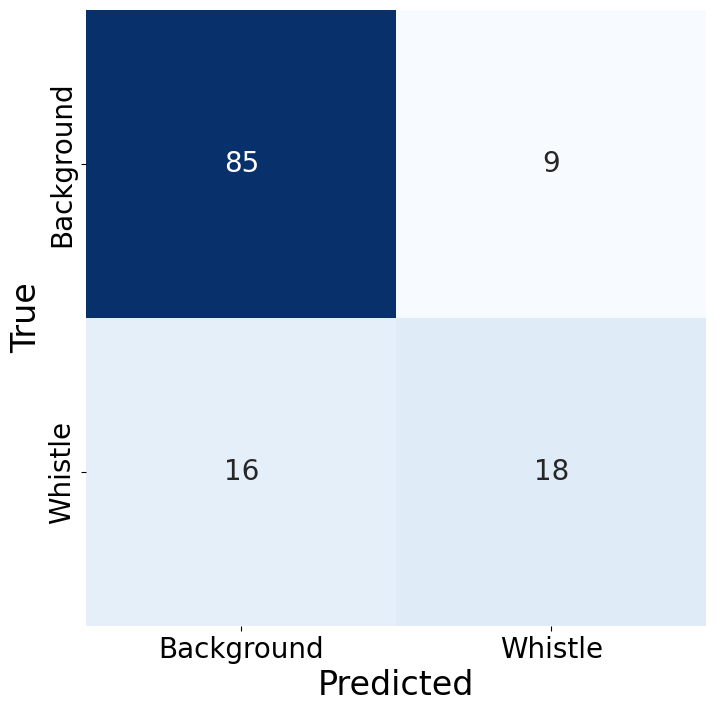

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        94
           1       0.67      0.53      0.59        34

    accuracy                           0.80       128
   macro avg       0.75      0.72      0.73       128
weighted avg       0.80      0.80      0.80       128



In [68]:
# Calculate all metrics for confidence score threshold 0.84
from sklearn.metrics import confusion_matrix, classification_report
# Set the threshold
threshold = 0.84

# Convert y_true to binary: 1 for 'Whistle', 0 for all others
y_true = (df_regression["Validation Value"] == "Whistle").astype(int).values
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score
# Predict labels based on the threshold
predicted_labels = (y_scores >= threshold).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Background', 'Whistle'],
    yticklabels=['Background', 'Whistle'],
    cbar=False,
    annot_kws={"size": 20}  # Make numbers bigger
)
plt.xlabel('Predicted', fontsize=24)
plt.ylabel('True', fontsize=24)
# plt.title(f'Confusion Matrix at Threshold {threshold:.2f}', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("../../../Figures/Deployment3_confusion_matrix_threshold_{:.2f}.pdf".format(threshold))
plt.show()

# Calculate classification report
print(classification_report(y_true, predicted_labels))